In [5]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization

import os
# Cifar-10 dataset은 32x32 픽셀의 600000개 컬러이미지이며 각이미지는 10개의 클래스로 라벨링 되어있음

Using TensorFlow backend.


In [6]:
batch_size = 16
num_classes = 10
epochs = 25

In [7]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [8]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
# to_categorical = 원핫인코딩으로 변경

In [9]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

네트워크를 직접 설계해 보세요!

In [10]:
# for example,
n_kernels = 32
#출력되는 output kernerl의 갯수(batch size)
model = Sequential()

# imput = 16, 32, 32, 3
model.add(Conv2D(n_kernels, (3,3), activation='relu', kernel_initializer='he_normal', padding='valid', input_shape=(32, 32, 3)))
#(16, 30, 30, 32)
# feature 맵이 32개인 이유 n_kernels의 갯수가 32개이기때문
model.add(Conv2D(n_kernels*2, (3, 3), activation='relu', kernel_initializer='he_normal', padding='valid'))
#(16, 28, 28, 64)
# feature map을 마지막이 아닌 현재에서 두배로 늘린 이유 : feature map의 병목을 막기위해
# 미리 늘려놓고 max pooling하는것이 정확도가 높기 때문
model.add(BatchNormalization())
model.add(MaxPooling2D())
#(16, 14, 14, 64)

# b, 14, 14, 64
model.add(Conv2D(n_kernels*2, (3,3), activation='relu', kernel_initializer='he_normal', padding='valid'))
model.add(Conv2D(n_kernels*4, (3, 3), activation='relu', kernel_initializer='he_normal', padding='valid'))
model.add(BatchNormalization())
model.add(MaxPooling2D())

# b, 8, 8, 128
model.add(Conv2D(n_kernels*8, (3,3), activation='relu', kernel_initializer='he_normal', padding='valid'))
model.add(BatchNormalization())


model.add(GlobalAveragePooling2D())
model.add(Dense(10, activation='softmax', kernel_initializer='glorot_uniform'))


NameError: name 'x' is not defined

In [ ]:
model.summary()

In [9]:
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)
# 점점 줄어듬

In [10]:
# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [2]:
trained_model = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test),
          shuffle=True)

NameError: name 'model' is not defined

In [12]:
epochs_range = range(25)
validation_accuracy = trained_model.history['val_accuracy']
training_accuracy = trained_model.history['accuracy']

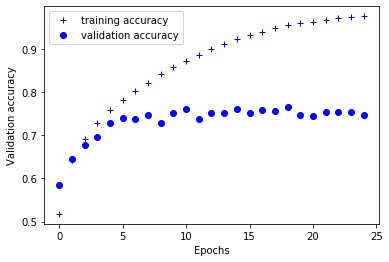

In [13]:
import matplotlib.pyplot as plt

plt.plot(epochs_range, training_accuracy, 'b+', label='training accuracy')
# ‘bo’는 파란색 점을 의미합니다
plt.plot(epochs_range, validation_accuracy, 'bo', label='validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Validation accuracy')
plt.legend()

plt.show()

In [14]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 1s 104us/step
Test loss: 0.9817177763938904
Test accuracy: 0.7462000250816345
